# Case-study: Data Science

**Author**: Jacopo Ventura

**Date**: 24th September 2017

Dataset: HR employee attrition and performance.

Tasks:
1. Import, clean and visualize the data
2. Bulid a predictive model of Employee churn
3. Generate and validate hypothesis of why Employees churn 
4. Build a lookalike model of the users and reason about their groupings

The goal of the project is to predict attrition. In HR termonology, attrition occurs when an employee retires or when the company eliminates his job.

## 3. Generate and validate hypothesis of why Employees churn 

We now perform some statistical tests to infer why employees churn. To perform these tests, we have the following variables:

- **Independent variable**: Attrition with levels YES or NO
- **Dependet variable**: numerical feature of the dataset

Since **samples are independet**, we perform **t-tests on independent samples**. To do this, we use the ttest_ind function in Python's  scipy.stats library, since performs the t-test on two independet samples.  

Note that it is rational to use t-test for even large sample (size $n > 30$), because the population variance is unknown.  As $n$ increases, t approaches to z, and t distribution simply becomes z distribution. In other words, with large $n$ t test is just close to z test and one don't loose anything to continue to use t test.


In [1]:
# Import packages for data analysis
import os    
import tarfile
from six.moves import urllib
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load dataset and save it as Pandas dataframe
data_path='C:/Users/jacopo/Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv'
dataset = pd.read_csv(data_path)   # dataset as pandas dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [2]:
# function for plotting distribution of data
from scipy.stats import ttest_ind
from matplotlib.pyplot import figure, subplot

# separate dataset attrition Y/N
dataset_attrition_Y = dataset.loc[dataset['Attrition'] == "Yes"]
dataset_attrition_N = dataset.loc[dataset['Attrition'] == "No"]

def plot_samples(attribute):
    
    # plot options
    label_font = 18

    # select independent samples
    sample_Y = dataset_attrition_Y[attribute]
    sample_N = dataset_attrition_N[attribute]
    
    
    # Plot
    data = [sample_Y,sample_N]
    
    figure(figsize=(17,5))
    plt.suptitle('Distribution of '+attribute, fontsize=label_font+2)
    p1 = subplot(1,2,1)
    # Box plot
    plt.boxplot(data, 0, 'gD')
    plt.ylabel(attribute,fontsize=label_font)
    plt.xlabel("Attrition",fontsize=label_font)
    p1.set_xticklabels(['YES','NO'])

    
    # Distribution
    p2 = subplot(1,2,2)
    sns.kdeplot(sample_Y,label="Attrition: YES")
    sns.kdeplot(sample_N,label="Attrition: NO")
    plt.xlabel(attribute,fontsize=label_font)

    return

In [3]:
# Define function for running hypothesis test
# We use scipy's ttest_ind. Note that it performs the two-tailed test only. To perform the one tailed, we must consider
# the relationship p_twotail = 2 * p_onetail
from scipy.stats import ttest_ind
from IPython.display import display
from pandas import DataFrame

    
    
def run_ztest(s1,s2,attribute,alpha,hyp,order):
    
    # hyp defines is the test is one tailed or two tailed.
    # In case of one-tailed, H0: s1<=s2; H1: s1>s2  (right positive, therefore t>0)
    # In case of two-taled, H0: s1=s2; H1: s1!=s2
    
    # perform t-test
    res = ttest_ind(s1,s2)
    t = res[0]
    p = res[1]
    
    if hyp=='one':
        # one tailed right test
        p = p/2
        null = 'mean_'+order[0]+'<=mean_'+order[1]
    else:
        null = 'mean_Y=mean_N'
        
    if p<alpha:
        result = 'H0: rejected'
    else:
        result = 'H0: accepted'        

    # Print table of descriptive statistics using PrettyTable
    display(DataFrame(data=[{"H_0":null, "t-value" : t, "p-value" : p, "alpha":alpha, "Test result": result}],
                      columns=["H_0","t-value", "p-value","alpha","Test result"], index=[attribute]).round(2))
    

### Perform statistical tests

We first plot the data distribution for the selected variable for both YES and NO Attrition. We then perform the **two-tailed independent t-test** on the two independent samples. If the null hypothesis of the two-tailed test is rejected, then we perform the **one-tailed independent t-test** on the same samples to infer how the population with and without attrition differn in terms of mean of the selected feature. 

** Daily rate**: the results of the two tests are significant at p < .05. For these reasons, we reject the null hypothesis that employees with attrition have lower or equal daily rate than employees without attrition.

** Distance from home**: the results of the two tests are significant at p < .05. For these reasons, we reject the null hypothesis that employees with attrition have lower or equal commuting distance than employees without attrition.

,H_0,t-value,p-value,alpha,Test result
DistanceFromHome,mean_Y=mean_N,2.99,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
DistanceFromHome,mean_Y<=mean_N,2.99,0.0,0.05,H0: rejected


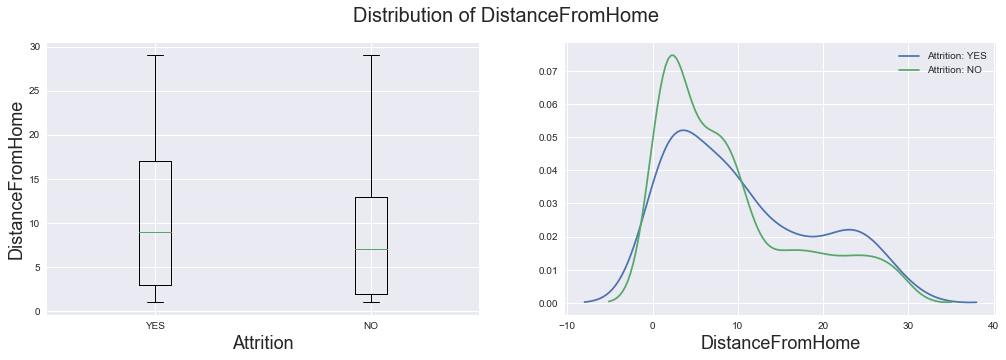

In [5]:
# Distance From Home
attr = 'DistanceFromHome'
plot_samples(attr)

# run test
s_Y = dataset_attrition_Y[attr]
s_N = dataset_attrition_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_Y,s_N,attr,0.05,'one','YN')

,H_0,t-value,p-value,alpha,Test result
Age,mean_Y=mean_N,-6.18,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
Age,mean_N<=mean_Y,6.18,0.0,0.05,H0: rejected


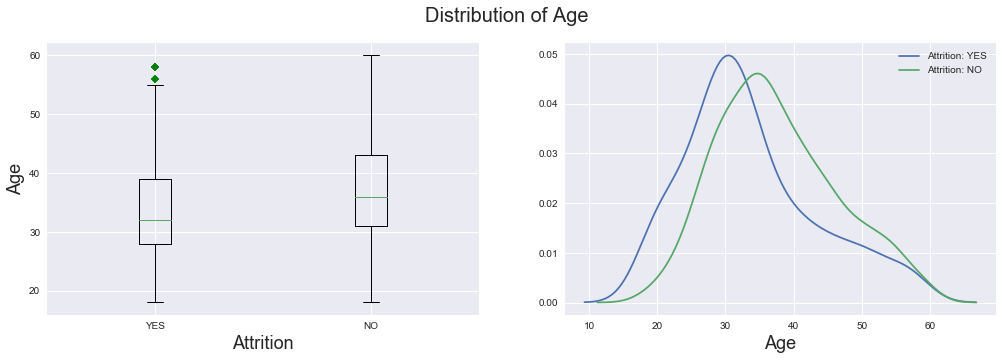

In [10]:
# Age
attr = 'Age'
plot_samples(attr)

# run test
s_Y = dataset_attrition_Y[attr]
s_N = dataset_attrition_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_N,s_Y,attr,0.05,'one','NY')

** Monthly Income**: the results of the two tests are significant at p < .05. For these reasons, we reject the null hypothesis that employees with attrition have lower or equal monthly income than employees without attrition.

,H_0,t-value,p-value,alpha,Test result
MonthlyIncome,mean_Y=mean_N,-6.2,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
MonthlyIncome,mean_N<=mean_Y,6.2,0.0,0.05,H0: rejected


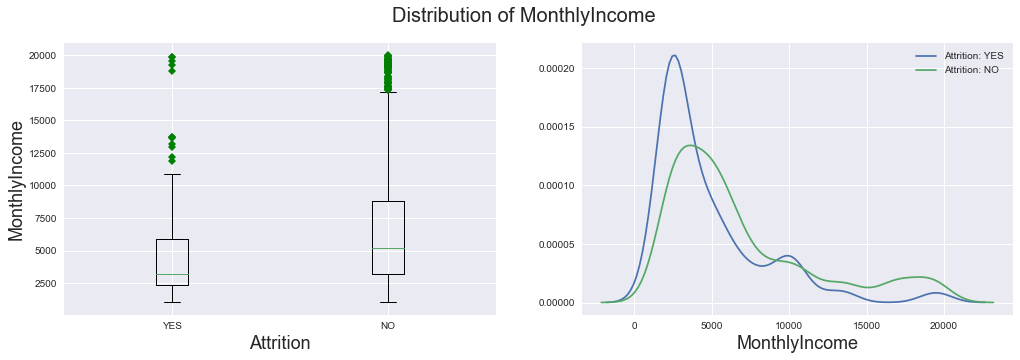

In [6]:
# MonthlyIncome
attr = 'MonthlyIncome'
plot_samples(attr)

# run test
s_Y = dataset_attrition_Y[attr]
s_N = dataset_attrition_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_N,s_Y,attr,0.05,'one','NY')

,H_0,t-value,p-value,alpha,Test result
YearsAtCompany,mean_Y=mean_N,-5.2,0.0,0.05,H0: rejected


,H_0,t-value,p-value,alpha,Test result
YearsAtCompany,mean_N<=mean_Y,5.2,0.0,0.05,H0: rejected


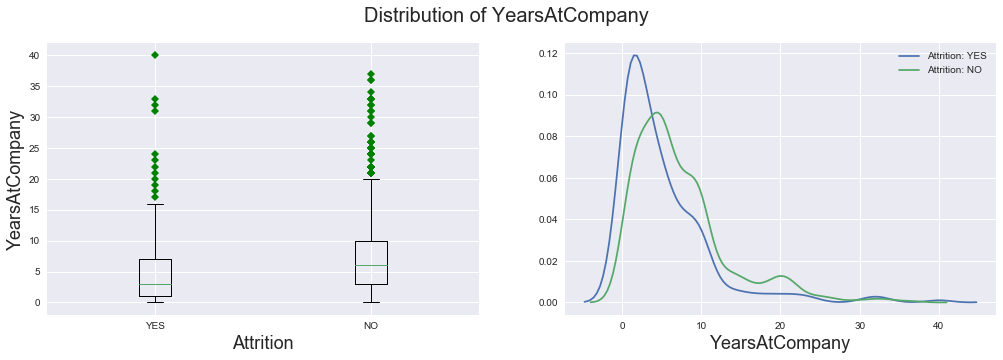

In [11]:
# YearsAtCompany
attr = 'YearsAtCompany'
plot_samples(attr)

# run test
s_Y = dataset_attrition_Y[attr]
s_N = dataset_attrition_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')
run_ztest(s_N,s_Y,attr,0.05,'one','NY')

**Years Since Last Promotion**: the results of the two-tailed test shows that p>.05 and we cannot reject the null hypothesis that employees with attrition have the same number of years since last promotion as the employees without attrition.


,H_0,t-value,p-value,alpha,Test result
YearsSinceLastPromotion,mean_Y=mean_N,-1.27,0.21,0.05,H0: accepted


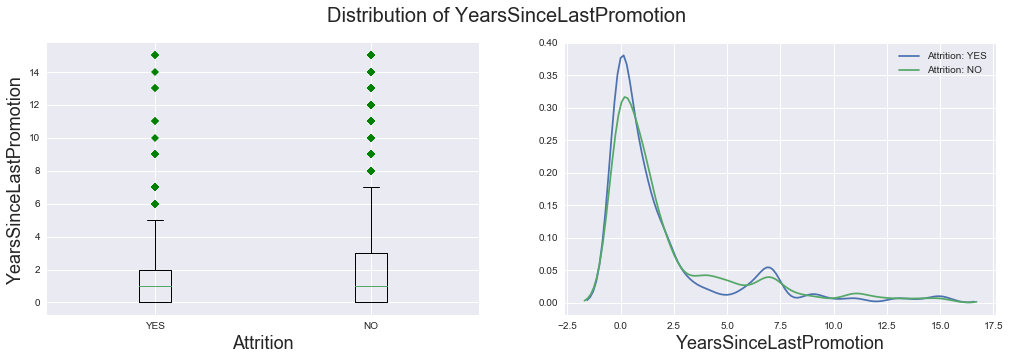

In [7]:
# Years Since Last Promotion
attr = 'YearsSinceLastPromotion'
plot_samples(attr)

# run test
s_Y = dataset_attrition_Y[attr]
s_N = dataset_attrition_N[attr]

run_ztest(s_Y,s_N,attr,0.05,'two','YN')


## Conclusions

We have performed some statistical test to infer the characteristics of employees that churn. We have found that the population of employees that churn have different means in the distribution of parameters with respect to the population of the employees that do not churn. For example, we have found that employees that churn have higher commuting distance, lower monthly income, less years at company than the population of employee that do not churn. These could be some of the reasons why employee churn. On the other hand, the results of the statistical analysis show that the population of the employees that churn have the same average of years since last promotion as the employees that do not churn. Therefore, we exclude years since last promotion as potential reason of attrition.

In summary, we have found that the population of employees that churn has:
- more commuting distance
- less monthly income
- less years at the company
- younger

than the population of employees that do not churn.